### 读入图片

In [1]:
%matplotlib notebook
from skimage import io as skio
import matplotlib.pyplot as plt
url = 'batch/France/105.jpg'
img = skio.imread(url)

<IPython.core.display.Javascript object>


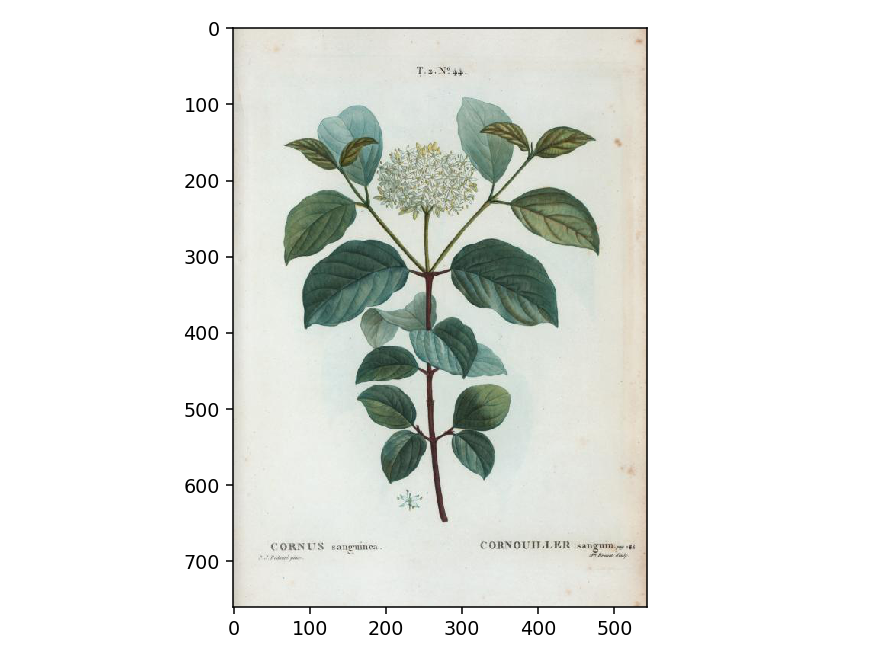

shape of image: (760, 543, 3)
dtype of image: uint8


In [2]:
plt.figure()
skio.imshow(img)
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

将图片转成黑白，方便应用过滤

<IPython.core.display.Javascript object>


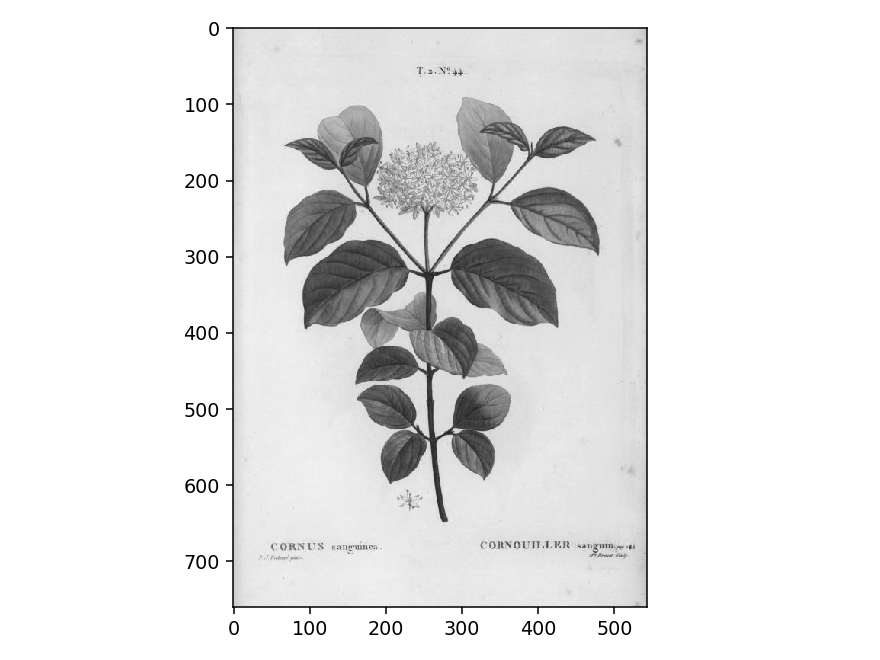

In [3]:
from skimage import color
grey = color.rgb2grey(img)
plt.figure()
skio.imshow(grey,cmap=plt.cm.gray)

### 应用过滤器

<IPython.core.display.Javascript object>


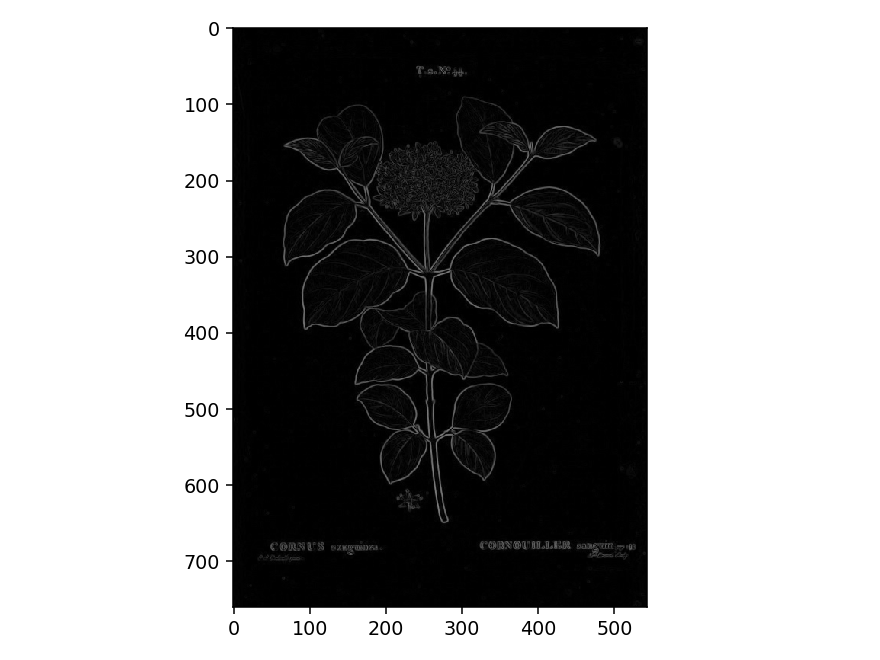

In [4]:
from skimage import filters
sobel = filters.sobel(grey)
plt.figure()
skio.imshow(sobel)

<IPython.core.display.Javascript object>


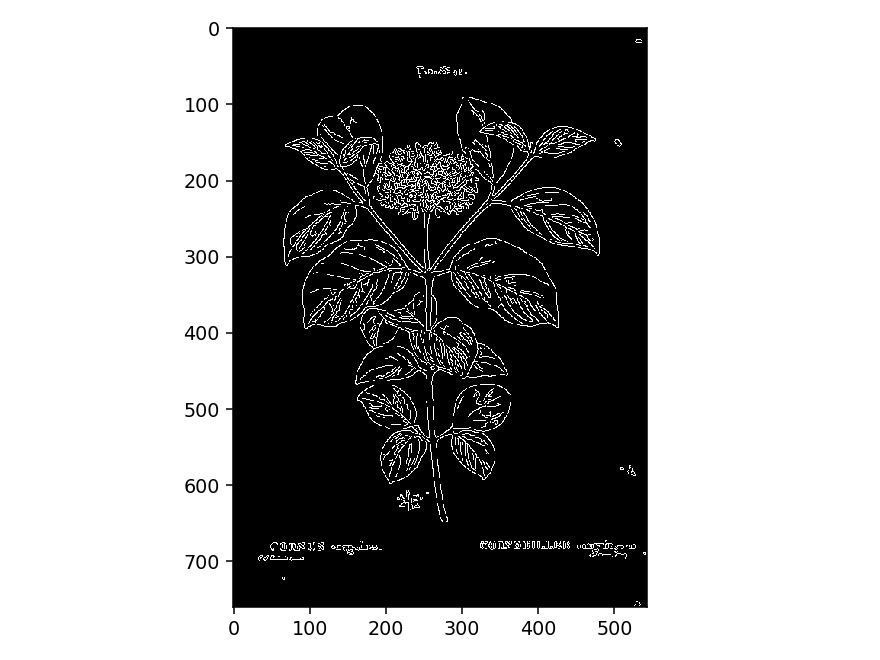

<IPython.core.display.Javascript object>


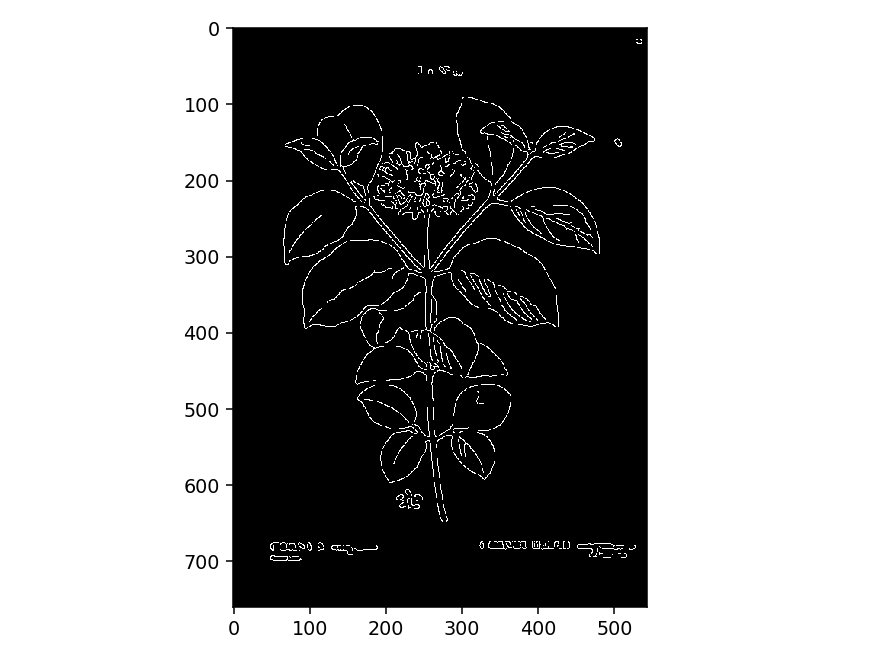

In [5]:
from skimage import feature
edges1 = feature.canny(grey)
edges2 = feature.canny(grey, sigma=2)
plt.figure()
skio.imshow(edges1)
plt.figure()
skio.imshow(edges2)
# plt.imsave("t.jpg",edges2,cmap=plt.cm.gray_r)

经过尝试，sobel过滤器的效果比较好。

### 选取较亮和较暗的部分

<IPython.core.display.Javascript object>


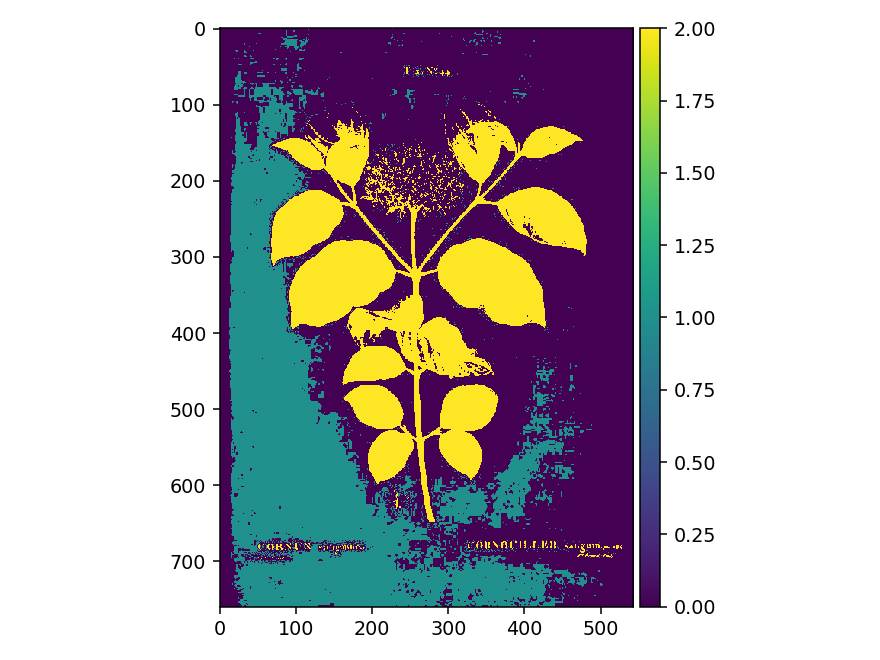

C:\Users\yeshu\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


In [6]:
import numpy as np
markers = np.zeros_like(grey)
markers[grey < 0.6] = 2 #黑色部分
markers[grey > 0.9] = 1 #白色部分
plt.figure()
skio.imshow(markers)

### 用watershed算法填充前景和背景

<IPython.core.display.Javascript object>


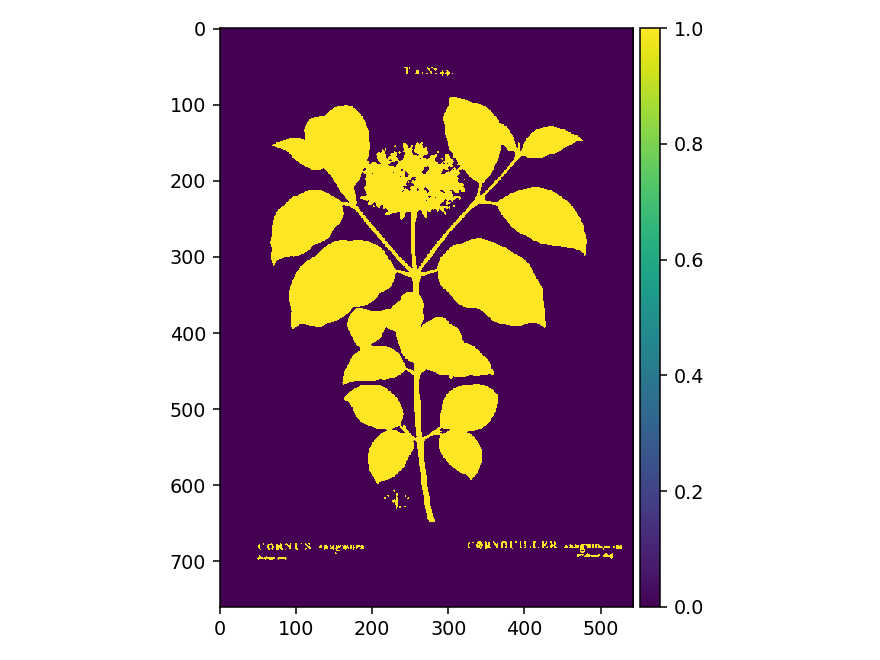

C:\Users\yeshu\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


In [7]:
from skimage.morphology import watershed
segmentation = watershed(sobel, markers)
plt.figure()
skio.imshow(segmentation-1)

### 将背景部分的alpha通道设为255（透明）

<IPython.core.display.Javascript object>


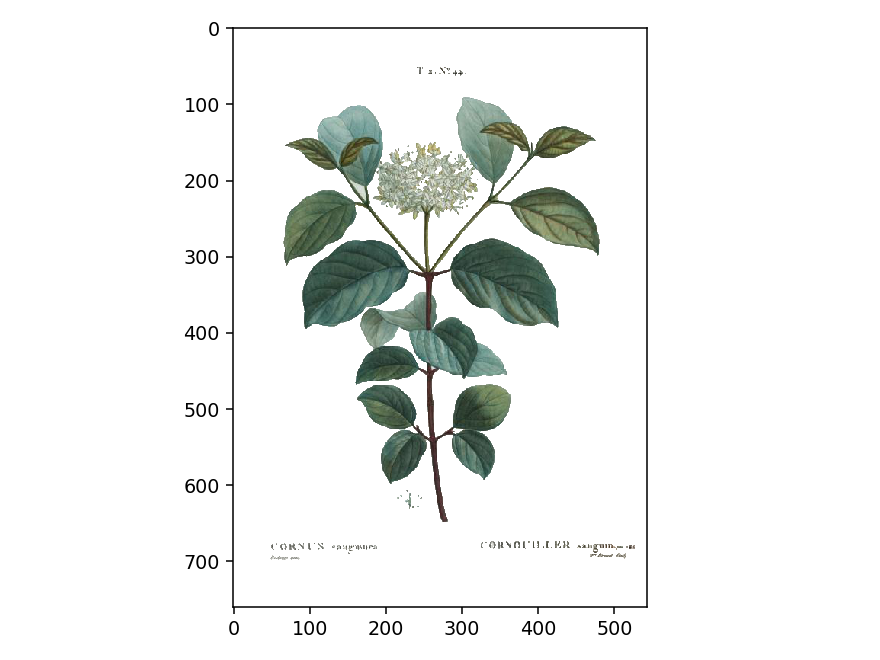

In [8]:
import numpy as np
img2 = np.dstack((img,(segmentation-1).astype(np.uint8)*255))
plt.figure()
skio.imshow(img2)
# skio.imsave("t2223.png",img2,)
# img2

### 选择（除背景外）最大的图块

<IPython.core.display.Javascript object>


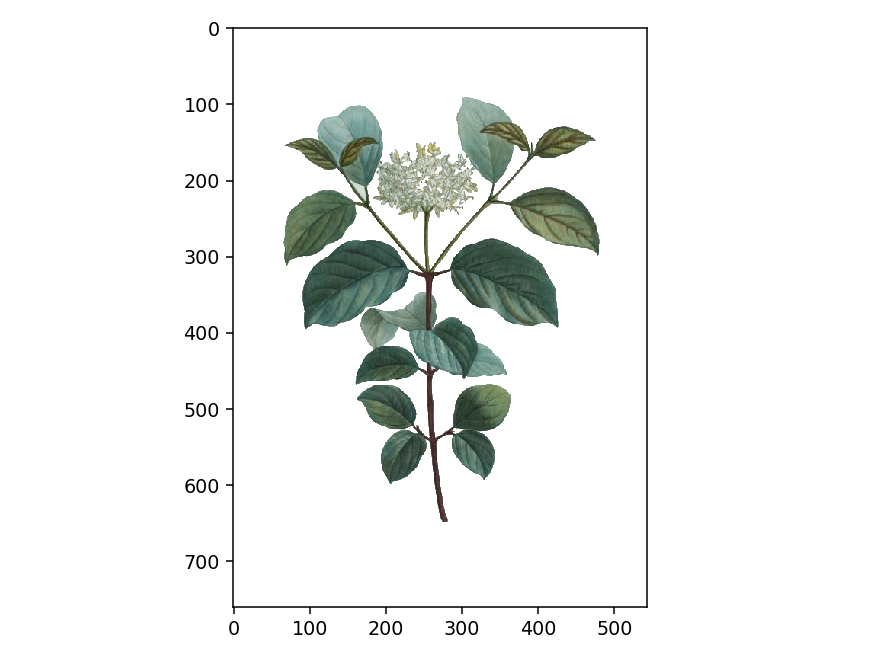

In [9]:
from scipy import ndimage as ndi
from skimage import measure
label_objects = measure.label(segmentation-1)
sizes = np.bincount(label_objects.ravel())
sizes[0]=0 ##去除背景部分
mask_sizes = sizes == max(sizes)
# np.shape(label_objects)
# plt.figure()
(mask_sizes[label_objects]).astype(np.uint8)
img2 = np.dstack((img,(mask_sizes[label_objects]).astype(np.uint8)*255))
plt.figure()
skio.imshow(img2)

### 去除白边

In [10]:
def bbox1(img):
    a = np.where(img != 0)
    bbox = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])
    return bbox

In [11]:
a,b,c,d=bbox1((mask_sizes[label_objects]).astype(np.uint8))


<IPython.core.display.Javascript object>


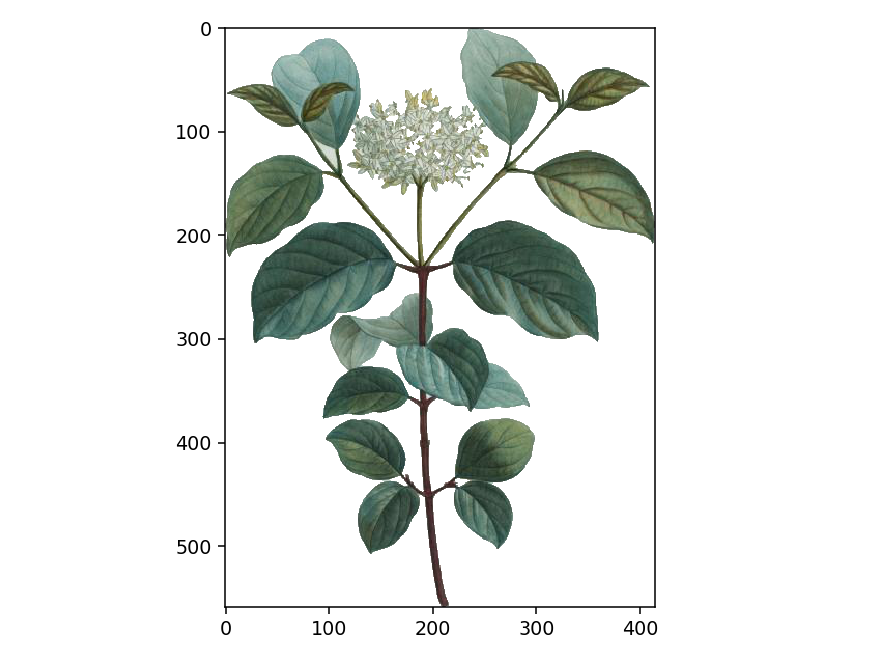

In [12]:
plt.figure()
skio.imshow(img2[a:b+1,c:d+1])